### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

#### Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

### Importing the Libraries

In [1]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer

## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the  numerical features if necessary.

In [2]:
df= pd.read_csv("dataset.csv")

In [3]:
df.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Checking For Null & Duplicate Values 

In [4]:
df.isnull().sum()

ï»¿age      0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.loc[df.duplicated(),:]

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


## Observation
* No null values
* One duplicate value

In [6]:
# removing duplicate value
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(302, 14)

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X,y

(     ï»¿age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0        63    1   3       145   233    1        0      150      0      2.3   
 1        37    1   2       130   250    0        1      187      0      3.5   
 2        41    0   1       130   204    0        0      172      0      1.4   
 3        56    1   1       120   236    0        1      178      0      0.8   
 4        57    0   0       120   354    0        1      163      1      0.6   
 ..      ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298      57    0   0       140   241    0        1      123      1      0.2   
 299      45    1   3       110   264    0        1      132      0      1.2   
 300      68    1   0       144   193    1        1      141      0      3.4   
 301      57    1   0       130   131    0        1      115      1      1.2   
 302      57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   

In [10]:
y.value_counts()

1    164
0    138
Name: target, dtype: int64

## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [12]:
X_train.shape, X_test.shape

((211, 13), (91, 13))

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

### Random forest classification model

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,max_depth=10)
classifier.fit(X_train1, y_train)

RandomForestClassifier(max_depth=10)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [16]:
# Creating a function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(X,y,model):
    y_pred = model.predict(X)
    acc = accuracy_score(y,y_pred)
    pre = precision_score(y,y_pred)
    rec = recall_score(y,y_pred)
    f1 = f1_score(y,y_pred)
    print(f'Accuracy Score  : {acc:.4f}')
    print(f'Precision Score : {pre:.4f}')
    print(f'Recall Score    : {rec:.4f}')
    print(f'F1 Score        : {f1:.4f}')
    return acc, pre, rec, f1

In [17]:
# Evaluate model on test data
acc_base, pre_base, rec_base, f1_base = evaluate_model(X_test1, y_test, classifier)

Accuracy Score  : 0.8352
Precision Score : 0.8400
Recall Score    : 0.8571
F1 Score        : 0.8485


In [18]:
from sklearn.metrics import classification_report
y_pred_test = classifier.predict(X_test1)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



<AxesSubplot: >

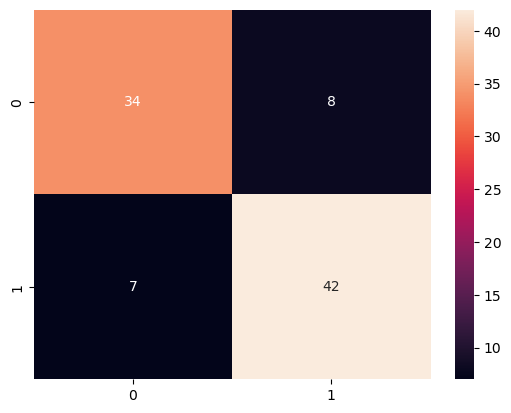

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_m= confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_m, annot=True, fmt='d')

## Question 5 : Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [20]:
classifier.feature_importances_

array([0.08419107, 0.02508861, 0.12163837, 0.07252076, 0.06926684,
       0.01055096, 0.02116624, 0.13301486, 0.06140657, 0.1067856 ,
       0.04902464, 0.13753879, 0.10780668])

In [21]:
importances = classifier.feature_importances_
feature_names = X.columns
imp = pd.Series(importances, index=feature_names)
imp = imp.sort_values(ascending=False)
imp

ca          0.137539
thalach     0.133015
cp          0.121638
thal        0.107807
oldpeak     0.106786
ï»¿age      0.084191
trestbps    0.072521
chol        0.069267
exang       0.061407
slope       0.049025
sex         0.025089
restecg     0.021166
fbs         0.010551
dtype: float64

In [22]:
top5 = list(imp[0:5].index)
print(f'Top 5 features in the data are : {top5}')

Top 5 features in the data are : ['ca', 'thalach', 'cp', 'thal', 'oldpeak']


<AxesSubplot: title={'center': 'Feature Importances Plot'}>

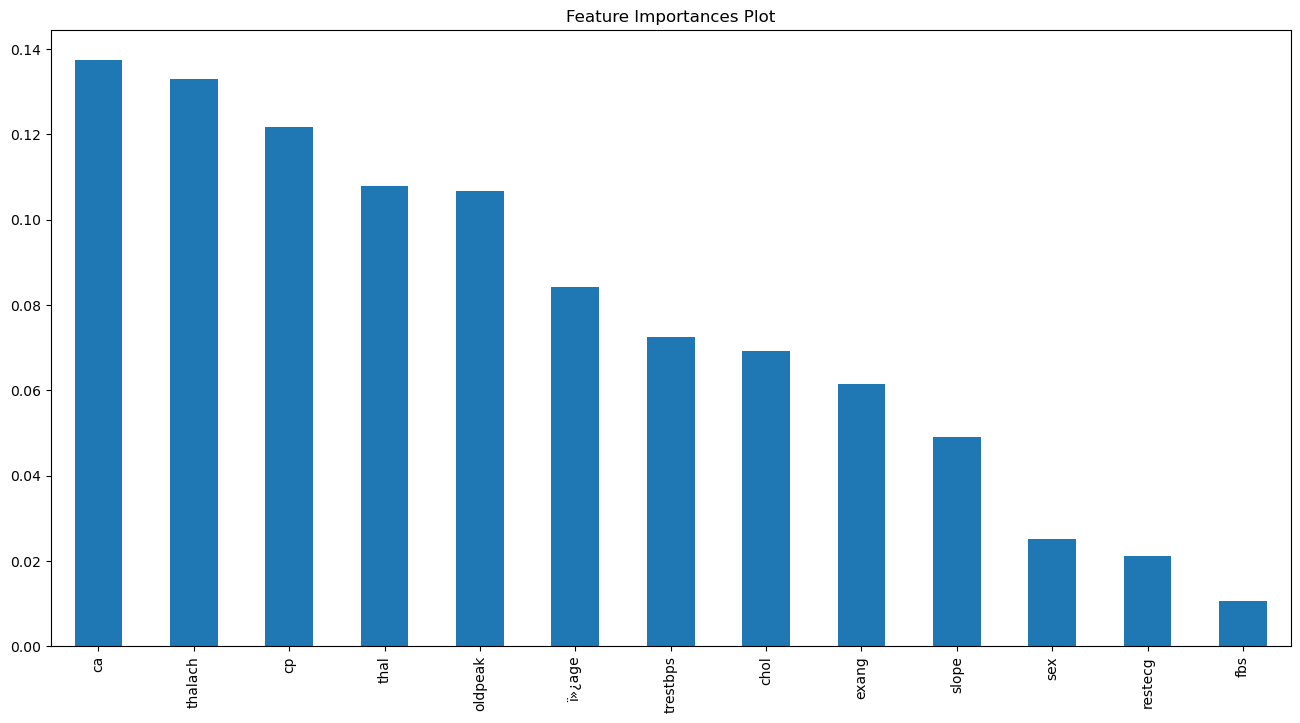

In [23]:
imp.plot(kind='bar',title='Feature Importances Plot', figsize=(16,8))

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [24]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [25]:
# Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=5, 
                          scoring='f1',
                          n_iter=50,
                          verbose=3)

In [26]:
rscv.fit(X_train1,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.800 total time=   0.1s
[CV 2/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.870 total time=   0.1s
[CV 3/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.851 total time=   0.1s
[CV 4/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.902 total time=   0.1s
[CV 5/5] END max_depth=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.773 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.844 total time=   0.8s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.917 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=0.792 total time=   0.7s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [27]:
rscv.best_score_

0.8624584980237154

In [28]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 10}

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [29]:
# Best Parameters
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [30]:
## Best Estimator (Model)
rscv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200)

In [31]:
# Testing Accuracy on tuned model
print('Results for Tuned Model :\n')
acc_tuned, pre_tuned , rec_tuned, f1_tuned = evaluate_model(X_test1,y_test.values.flatten(),rscv)

Results for Tuned Model :

Accuracy Score  : 0.8681
Precision Score : 0.8776
Recall Score    : 0.8776
F1 Score        : 0.8776


In [32]:
dct = {
    'metrics':['accuracy','precision','recall','f1'],
    'base model':[acc_base,pre_base,rec_base,f1_base],
    'tuned model':[acc_tuned,pre_tuned,rec_tuned,f1_tuned]
}

In [33]:
df_compare = pd.DataFrame(dct)
df_compare

,metrics,base model,tuned model
0,accuracy,0.835165,0.868132
1,precision,0.840000,0.877551
2,recall,0.857143,0.877551
3,f1,0.848485,0.877551


### Insights

* All parameters of the tuned model increases all scores.

## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [34]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200)

In [35]:
imp1= best_rfc.feature_importances_
feature_names1 = X.columns
imp_tuned = pd.Series(imp1, index=feature_names1)
imp_tuned = imp_tuned.sort_values(ascending=False)
imp_tuned

ca          0.163723
cp          0.153866
thal        0.144075
thalach     0.132660
oldpeak     0.100759
exang       0.083142
ï»¿age      0.059299
slope       0.045857
trestbps    0.038758
chol        0.037138
sex         0.027499
restecg     0.010931
fbs         0.002292
dtype: float64

In [36]:
imp_tuned[0:2]

ca    0.163723
cp    0.153866
dtype: float64

<AxesSubplot: title={'center': 'Feature Importances for tuned model'}>

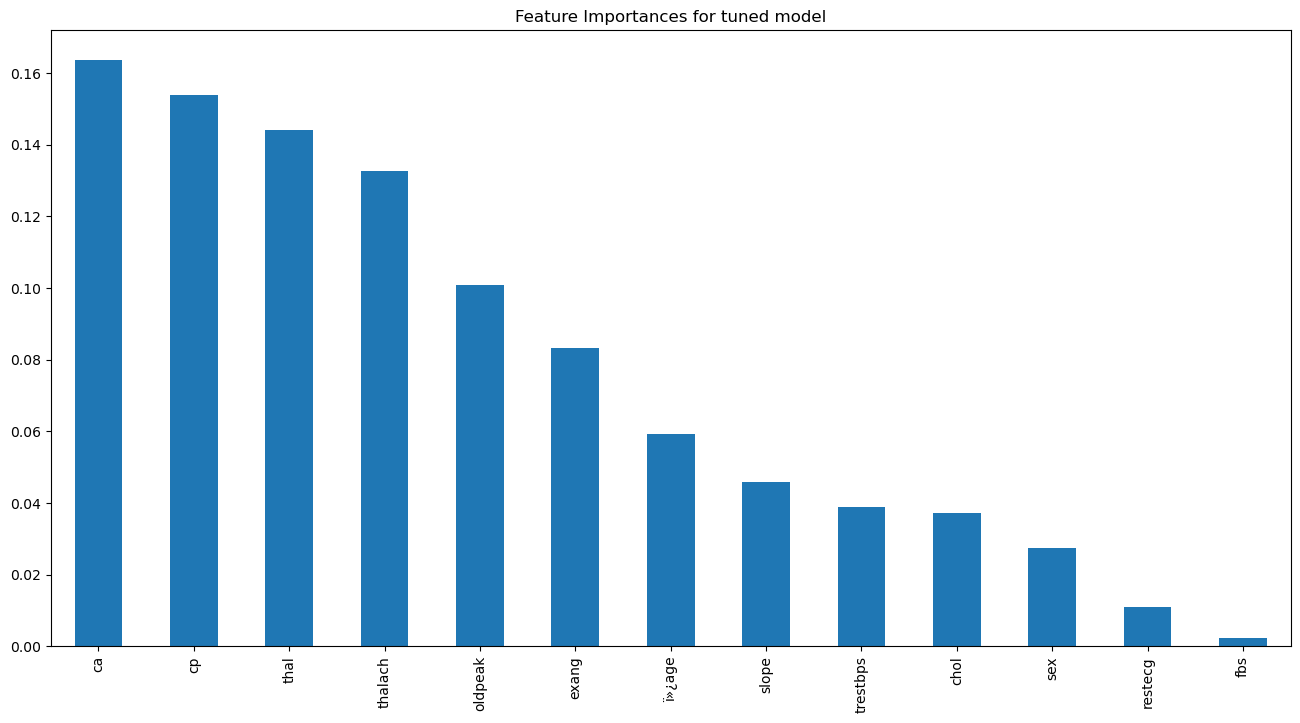

In [37]:
imp_tuned.plot(kind='bar',title='Feature Importances for tuned model',figsize=(16,8))

In [38]:
X_train.shape

(211, 13)

In [39]:
top2 = X_train[['ca','cp']]
top2.head()

,ca,cp
124,0,2
72,0,1
15,0,2
10,0,0
163,4,2


In [41]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,ca,cp,target
124,0,2,1
72,0,1,1
15,0,2,1
10,0,0,1
163,4,2,1


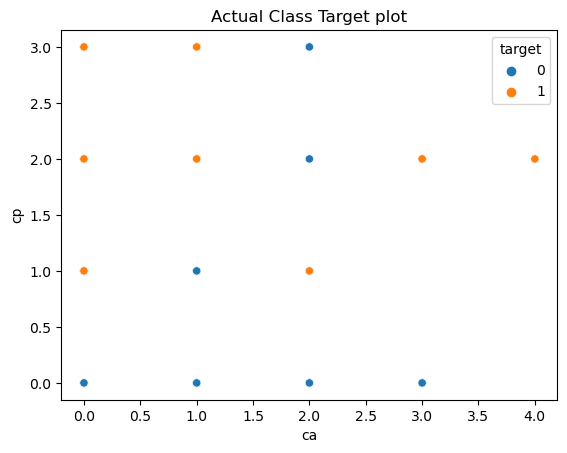

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='target')
plt.title('Actual Class Target plot')
plt.show()

In [43]:
df_top2['predicted'] = best_rfc.predict(X_train1)

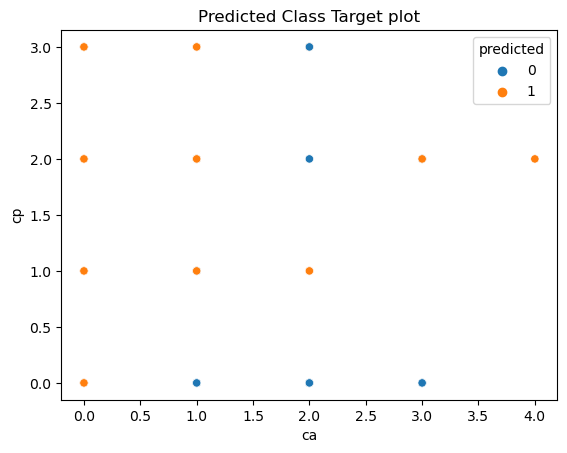

In [44]:
sns.scatterplot(data=df_top2,x='ca',y='cp',hue='predicted')
plt.title('Predicted Class Target plot')
plt.show()